In [18]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/ValentineKornel/MMO/refs/heads/master/StudentPerformanceFactors_Normalized.csv"
df = pd.read_csv(url)
df=df.drop(["Extracurricular_Activities"],axis=1)
df=df.drop(["Internet_Access"],axis=1)
df=df.drop(["School_Type"],axis=1)
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Peer_Influence,Physical_Activity,Distance_from_Home,Gender,Exam_Score
0,23.000000,84,1.0,3.0,7.000000,73,1,0,1,1,3,1.0,0,67
1,19.997459,64,1.0,2.0,8.000000,59,1,2,2,-1,4,2.0,1,61
2,24.000000,98,2.0,2.0,7.000000,91,2,2,2,0,4,1.0,0,74
3,29.000000,89,1.0,2.0,8.000000,98,2,1,2,-1,4,2.0,0,71
4,19.000000,92,2.0,2.0,7.026635,65,2,3,2,0,4,1.0,1,70


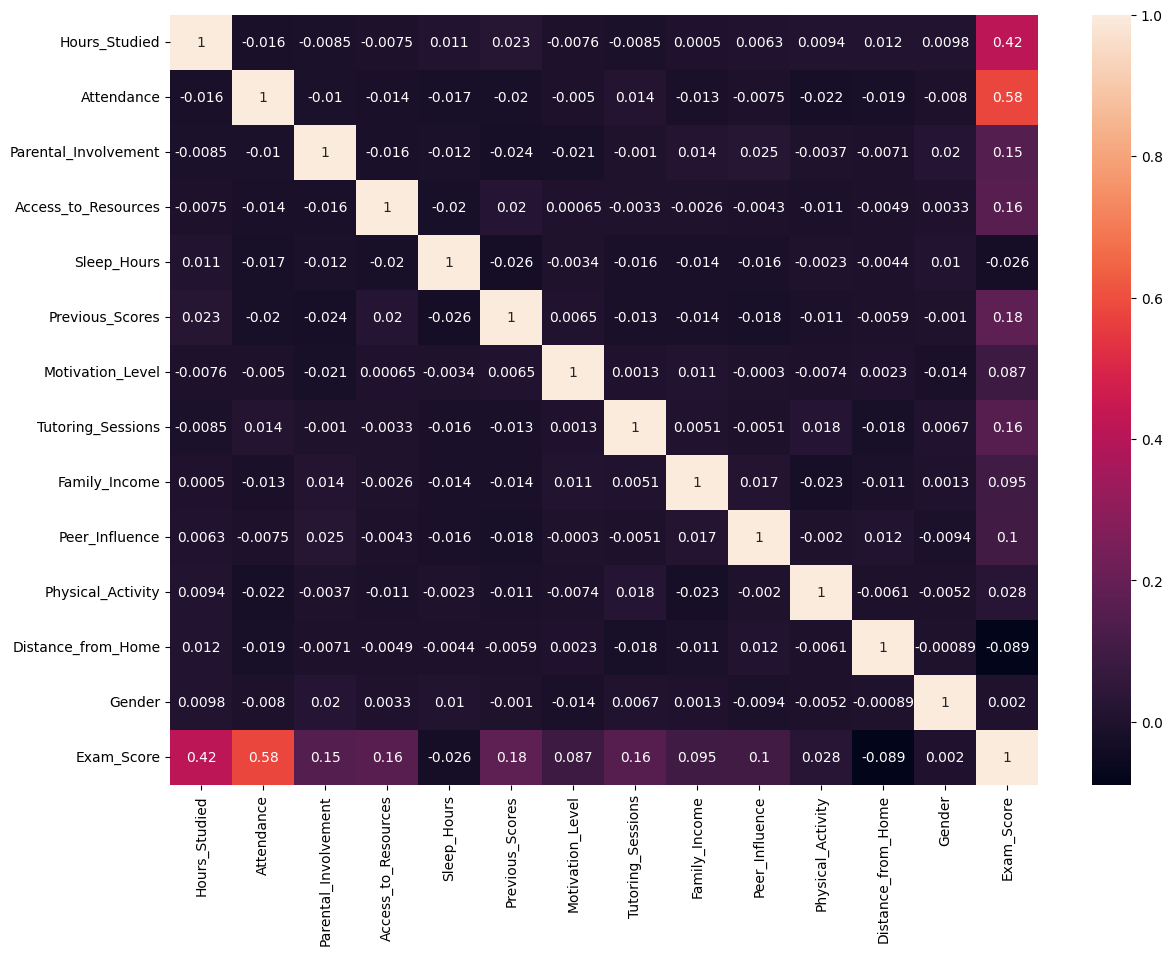

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
hm = sns.heatmap(df.corr(), cbar=True, annot=True)
plt.show()

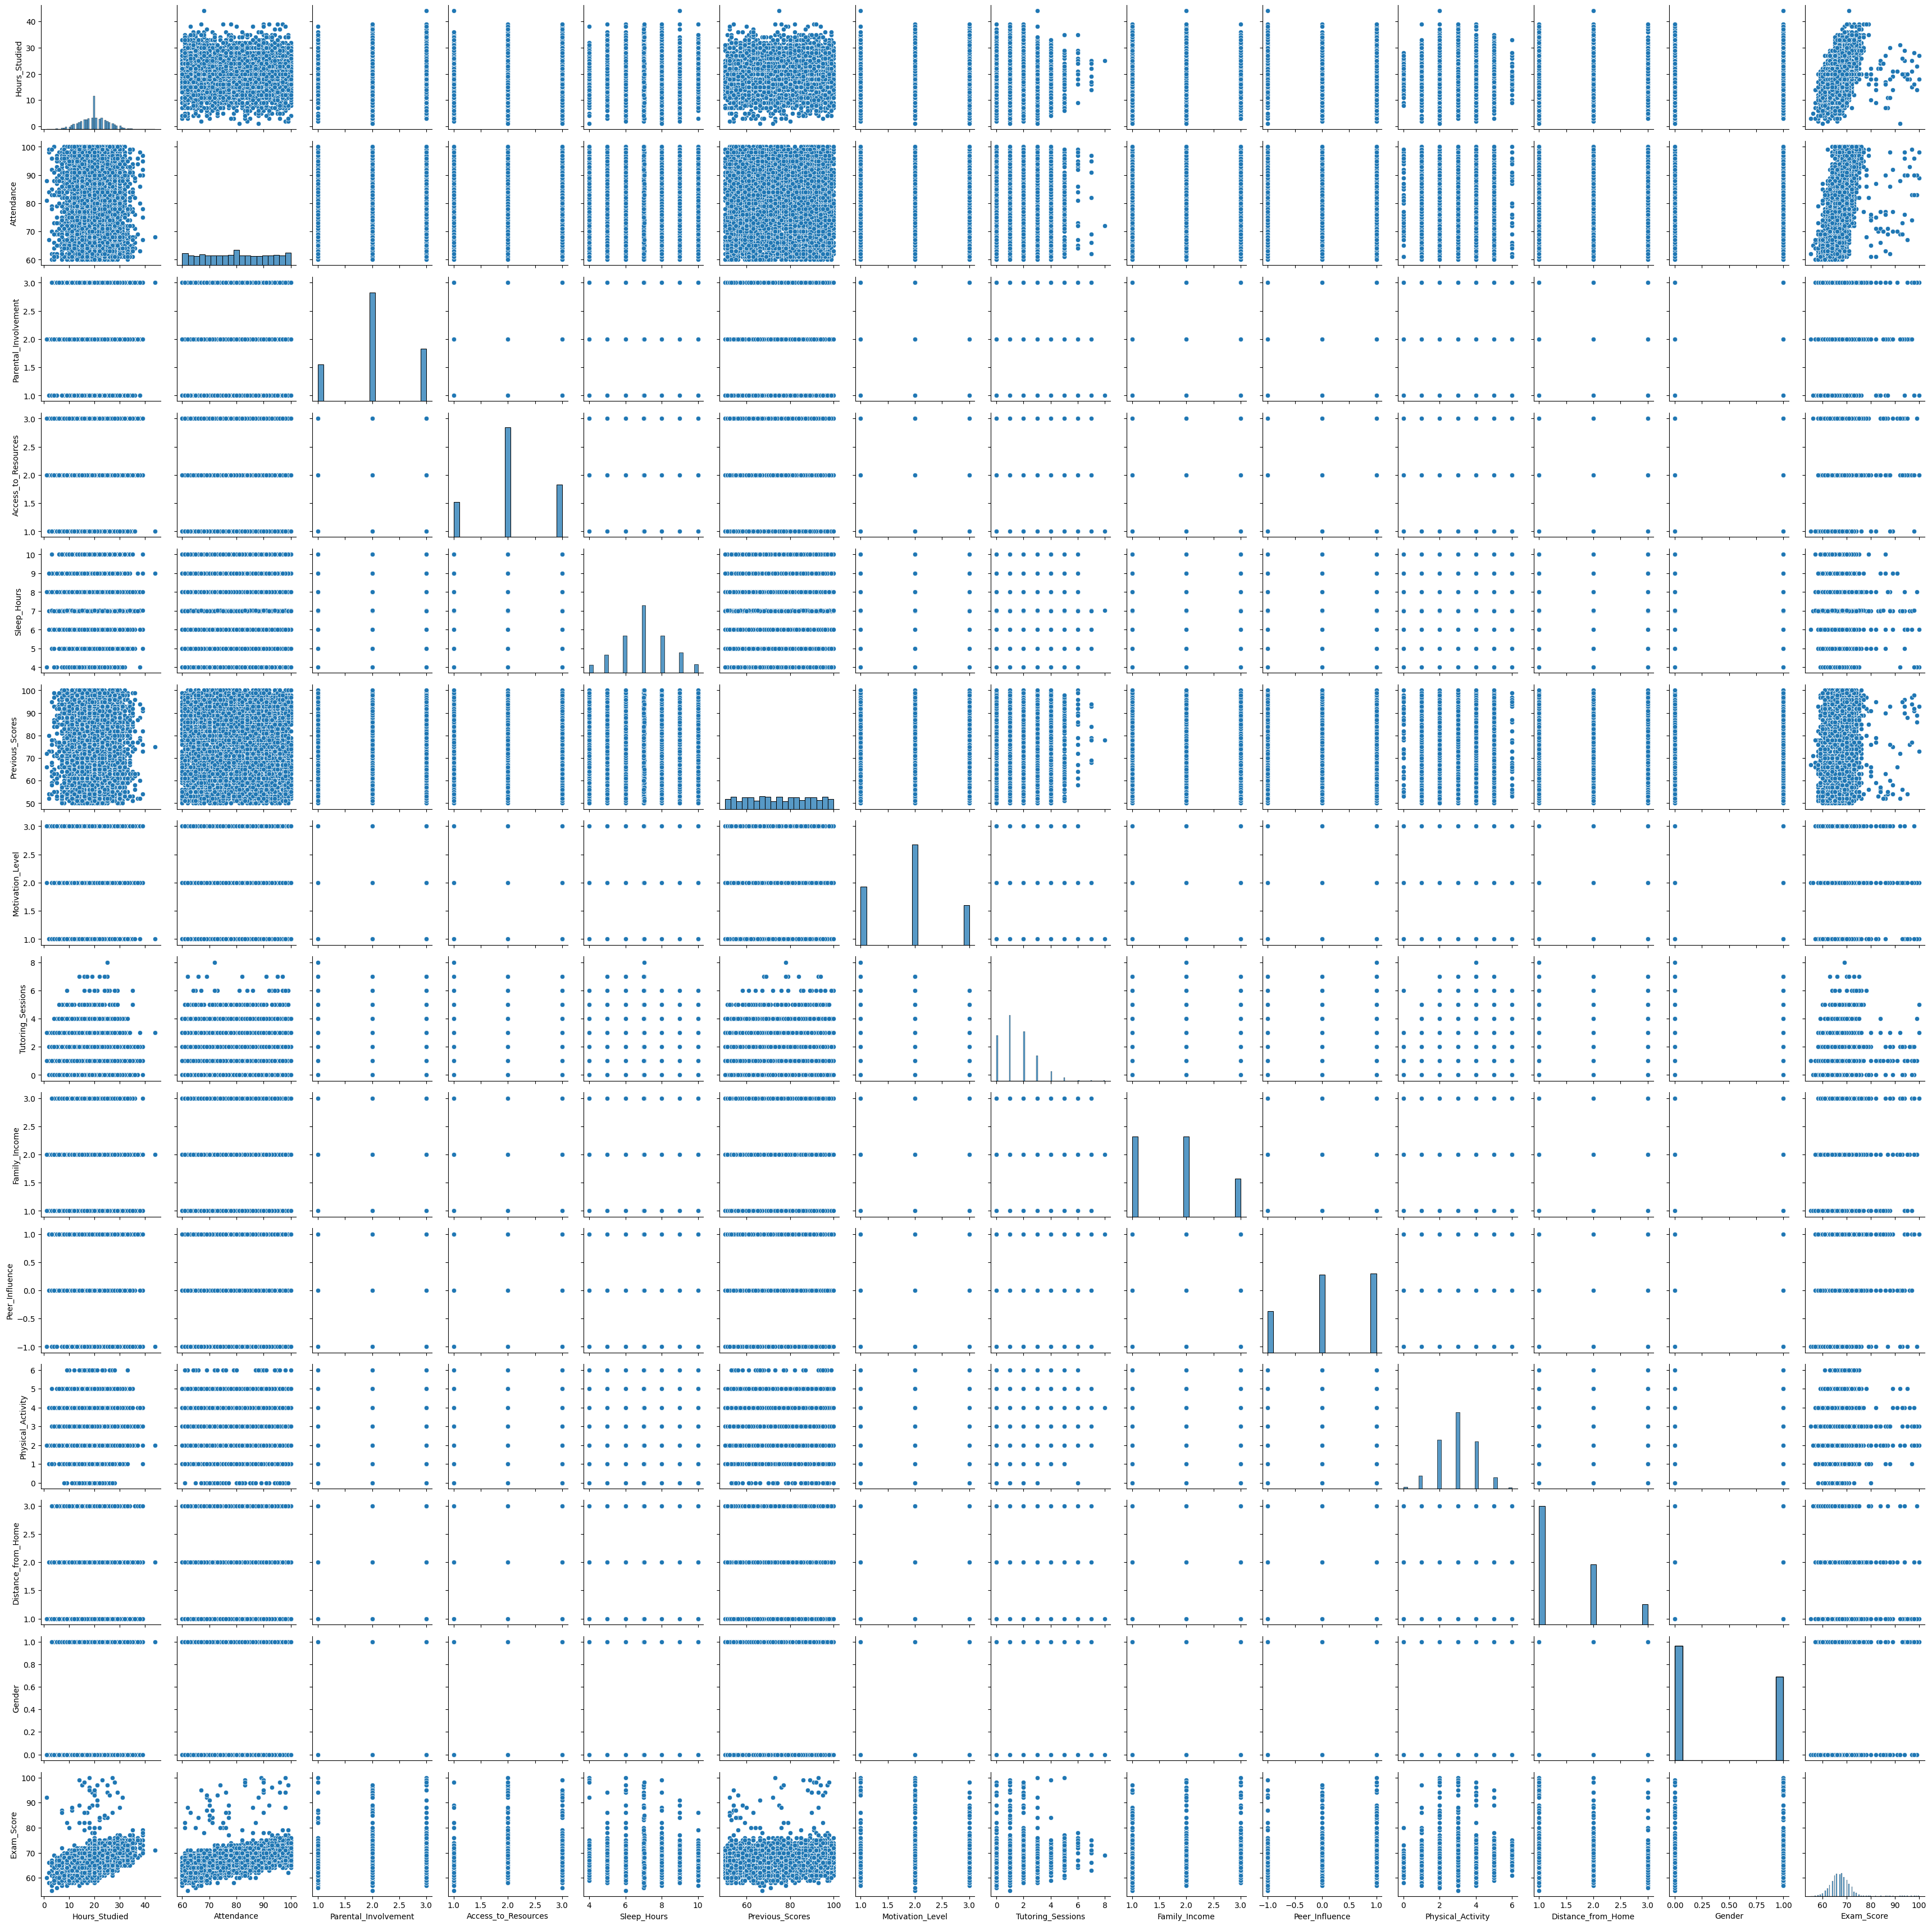

In [20]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

0.19574825987730546
51.58006148781188
The linear model is: Y = 51.58 + 0.19575*Attendance


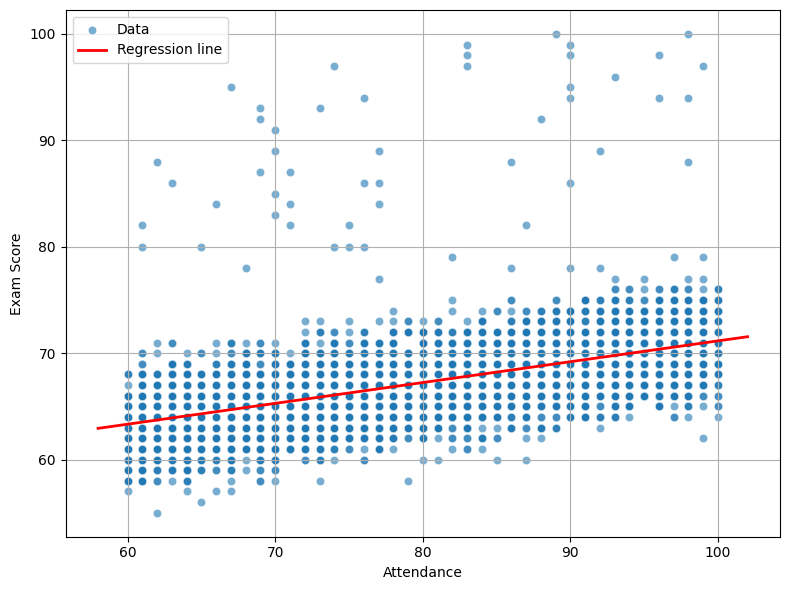

In [34]:
from sklearn.linear_model import LinearRegression
x = df['Attendance'].values.reshape(-1, 1)
y = df['Exam_Score'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)

slope = reg.coef_[0][0]
intercept = reg.intercept_[0]
print(slope)
print(intercept)
print("The linear model is: Y = {:.5} + {:.5}*Attendance".format(reg.intercept_[0], reg.coef_[0][0]))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, alpha=0.6, label='Data')

x_vals = np.array(plt.gca().get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2, label='Regression line')

plt.xlabel("Attendance")
plt.ylabel("Exam Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
y_pred = reg.predict(x)

r2 = reg.score(x, y)
print(f"Коэффициент детерминации: {r2:.5f}")

Коэффициент детерминации: 0.33780


In [39]:
x = df[['Attendance', 'Hours_Studied', 'Previous_Scores']].values
y = df['Exam_Score'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, y)
slope = reg.coef_
intercept = reg.intercept_
print(slope)
print(intercept)

print("The linear model is: Y = {:.5} + {:.5}*Attendance + {:.5}*Hours_Studied + {:.5}*Previous_Scores".format(intercept[0], slope[0][0], slope[0][1], slope[0][2]))


[[0.19915903 0.28941916 0.04794274]]
[41.92054201]
The linear model is: Y = 41.921 + 0.19916*Attendance + 0.28942*Hours_Studied + 0.047943*Previous_Scores


In [40]:
y_pred = reg.predict(x)

r2 = reg.score(x, y)
print(f"Коэффициент детерминации: {r2:.5f}")

Коэффициент детерминации: 0.54940
